## Statistical Hypothesis Testing

Statistical hypothesis testing is a method of statistical inference used to decide whether the data at hand sufficiently supports a particular hypothesis. Typically, we define a null hypothesis, and try to prove that null hypothesis wrong. For instance, in Student's t-test we state that the null hypothesis is that there is no difference between the mean of the two populations.

Another example would be to A/B test the effect of a change to a company's website on the click-through rate. The null hypothesis would be that the change to the company's website did not have an effect on click-through rate, and you would effectively need to prove this wrong.

## Student's t-test

The Student's t-test helps us understand if the difference between two samples is statistically significant accounting for noise in the signal between two samples. Say for instance we are comparing the following two data sets. We know the mean is different, but because the variance can be different, maybe most of the samples overlap, and if so maybe there is no meaningful difference. Below you can see the gray values on the third plot are the ones which overlap between both data sets. 

We can form this as a hypothesis, where the null hypothesis is that there is no difference between samples, and the other hypothesis being that there is a difference.


<AxesSubplot:ylabel='Count'>

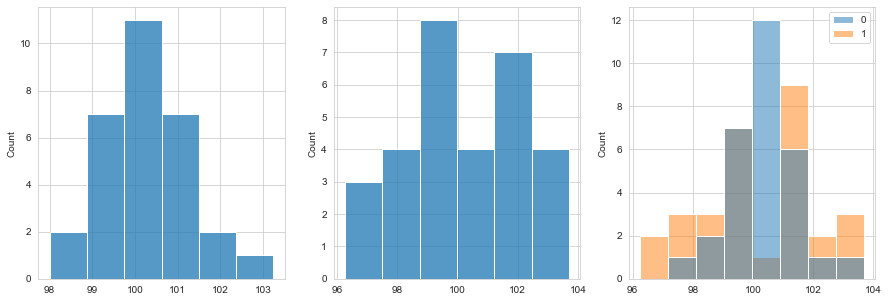

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

np.random.seed(12345) 

xa = np.random.normal(loc=100,scale=1,size=30)
xb = np.random.normal(loc=101,scale=2,size=30)
sns.set_style('whitegrid')

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)
sns.histplot(xa, ax=ax[0])
sns.histplot(xb, ax=ax[1])
sns.histplot([xa,xb], ax=ax[2])

The t-test looks at the difference between mean and creates a ratio between the mean and the square root of the sum of variance over the sample size for each sample, or the sinal to noise ratio, where noise is the variance in the samples. 

"A large t-value means that the difference between group means is greater than the pooled standard error, indicating a more signficant difference between groups." - https://www.scribbr.com/statistics/t-test/

We can compute the t-value in python as follows:

In [64]:
stats.ttest_ind(xa,xb)[0]

0.4043503158868411

The p value tells us the probability that this occured by chance. Low p-values indicate that this result was not due to chance, and therefore gives us a stronger indication that we can reject the null hypothesis. 

This is probabilistic, so even though the p-value can give us a guage of how likely or unlikely the difference between the two samples is, it can still result in an error. Those errors are classified as:

* **Type I. Error:** Reject the null hypothesis when there is in fact no significant effect (false positive). The p-value is optimistically small. 

* **Type II. Error:** Do not reject the null hypothesis when there is a signficiant effect (false negative). The p-value is too large.

We can get the p-value by selecting the second value in the tuple which is returned by the above ttest_ind function.

In [65]:
stats.ttest_ind(xa,xb)[1]

0.687442377885624

### Steps in a Student's t-test:

* 1. Select alpha or the signfigance level. The most commonly used signfigance level is .05
* 2. Determine if it is a one-tailed test or two tailed test. Most commonly a two tailed test. If it is a two tailed test, take the alpha or significance level and divide it by two. 
* 3. Take 1 minus the signfigance level for instance if we use .05 for a two tailed test we get 1-(.05/2) or .975. 
* 4. Determine the degrees of freedom which would be the sample size minus the number of samples, so in the above example the sample size is 30 and we have two seperate samples. That would give us degrees of freedom of 28. 
* 4. Use the t-table and look up the value at the degrees of freedom and the number resulting from step 3. An table can be found at the link below. The t-table has a value of 2.048. 
* 5. Interpret the result based on the test type, for a two sided test we take the absolute value of the test statstic and if is greater than the value of 2.048 we reject it. In this case, it is not greater so we would not reject the null hypothesis. 
https://www.itl.nist.gov/div898/handbook/eda/section3/eda3672.htm#:~:text=The%20most%20commonly%20used%20significance,we%20reject%20the%20null%20hypothesis.

Now let's alter the data we used to run this test and see if we get a different result. Below we've shifted the mean and the standard dev, now you can see there is no overlap between the two data sets. We should see a larger t-value.

<AxesSubplot:ylabel='Count'>

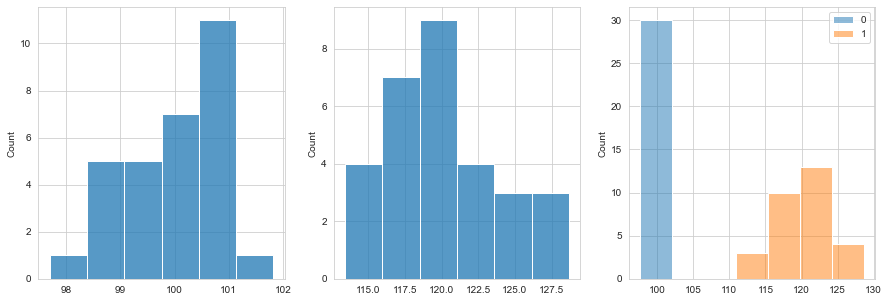

In [66]:
xa = np.random.normal(loc=100,scale=1,size=30)

#let's shift the mean and stdev
xb = np.random.normal(loc=120,scale=4,size=30)
sns.set_style('whitegrid')

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)
sns.histplot(xa, ax=ax[0])
sns.histplot(xb, ax=ax[1])
sns.histplot([xa,xb], ax=ax[2])  

In [67]:
print('t statistic',stats.ttest_ind(xa,xb)[0])

t statistic -27.621564867099366


In [68]:
print('p value',stats.ttest_ind(xa,xb)[1])

p value 4.549149786548353e-35


We would reject the null hypothesis now because the absolute value of the T statistic is greater than the value of 2.048, and we see a very low p value, meaning that the probability that this difference was determined by chance is very low. To make life easier, we can create a function to perform a t-test. 

In [81]:
def t_test(a,b,alpha=.05,test_type='two'):
    
    '''Performs a t-test on two arrays.
    
    Keyword arguments:
    a -- first array
    b -- second array
    alpha -- default .05
    test_type -- 'two', 'upper', or 'lower' 
    
    '''
    ttest = stats.ttest_ind(a,b)
    t_stat = ttest[0]
    p_val = ttest[1]
    
    reject_null = False
    
    if test_type == 'two':
        critical_value = stats.t.ppf(q=(1-(alpha/2)),df=len((a)-2))
        if abs(t_stat) > critical_value:
            reject_null = True
    
    if test_type == 'upper':
        critical_value = stats.t.ppf(q=(1-alpha),df=len((a)-2))
        if t_stat > critical_value:
            reject_null = True 
            
    if test_type == 'lower':  
        critical_value = stats.t.ppf(q=(1-alpha),df=len((a)-2))
        if t_stat < critical_value:
            reject_null = True
       
    return {'t_statistic':t_stat,
            'p_value':p_val,
            'critical_value':critical_value,
            'reject_null':reject_null}


Lets run a few iterations and graph the overlap of the sample sets to visually compare results.

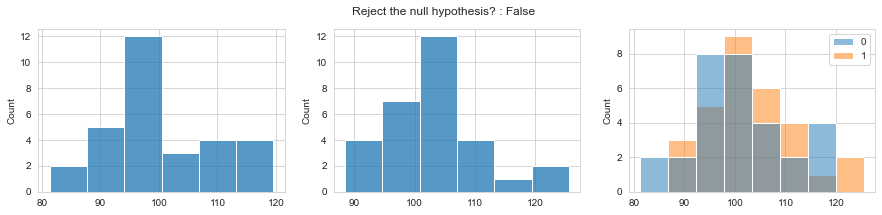

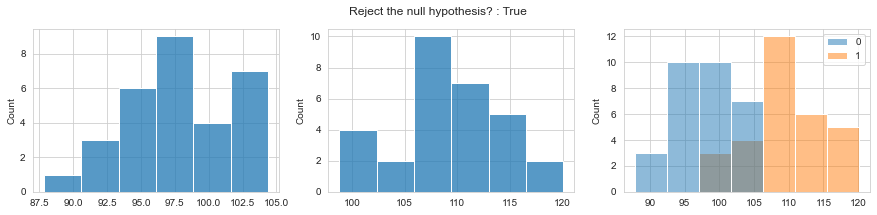

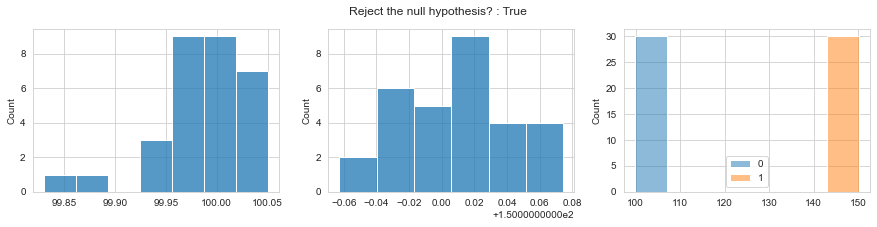

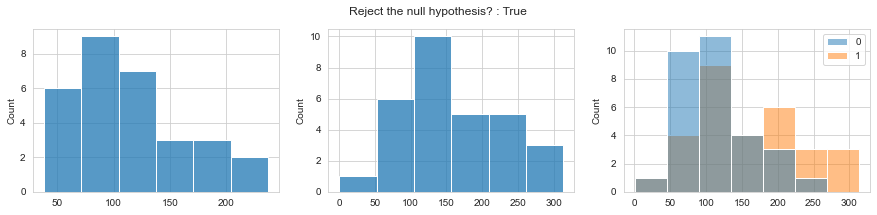

In [86]:
params = [[100,101,10],[100,110,5],[100,150,.05],[100,150,50]]

for p in params:
    xa = np.random.normal(loc=p[0],scale=p[2],size=30)
    xb = np.random.normal(loc=p[1],scale=p[2],size=30)
    
    t_test_results = t_test(xa,xb)
    result_text = 'Reject the null hypothesis? : '+ str(t_test_results['reject_null'])
    
    fig,ax = plt.subplots(1,3)
    fig.suptitle(result_text)
    fig.set_size_inches(15,3)
    sns.histplot(xa, ax=ax[0])
    sns.histplot(xb, ax=ax[1])
    sns.histplot([xa,xb], ax=ax[2]) 

### Condsiderations

These points should be considered before executing a t-test:

* The data should be normally distributed
* There should be similar variance between the two samples
* There should be approximately the same number in both samples
* If you are above 30 samples you should use a Z-test